<a href="https://colab.research.google.com/github/Kayalks/deep_learning/blob/master/cnn_cifar10_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CNN Image Classification**                

# Import Libraries

In [1]:
import keras.utils
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from google.colab.patches import cv2_imshow


# Building the Classifier

In [2]:
class CNNClassifier:
    def __init__(self):
        # Initializing the class variables
        (self.X_train,self.y_train),(self.X_test,self.y_test) = datasets.cifar10.load_data()
        self.y_train = self.y_train.reshape(-1,)
        self.y_test = self.y_test.reshape(-1, )
        self.classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
        self.X_train_scaled = None
        self.X_test_scaled = None
        self.y_train_categorical = None
        self.y_test_categorical = None

    def plot_sample(self,X,y,index):
        # Plot sample data
        plt.figure(figsize=(15,2))
        plt.imshow(X[index])
        plt.xlabel(self.classes[y[index]])
        plt.show()

    def normalize_data(self):
        ## Normalization of the data
        self.X_train_scaled = self.X_train/255
        self.X_test_scaled = self.X_test/255
        #self.y_train_categorical = keras.utils.to_categorical(self.y_train,num_classes=10,dtype='float32')
        #self.y_test_categorical = keras.utils.to_categorical(self.y_test,num_classes=10,dtype='float32')

    def cnnModel(self,epochs):
        # Building a CNN model
        model = keras.Sequential([
            #cnn layers
            layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
            layers.MaxPooling2D((2,2)),
            layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
            layers.MaxPooling2D((2, 2)),
            layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
            layers.MaxPooling2D((2, 2)),

            #dense layers
            keras.layers.Flatten(),
            keras.layers.Dense(64, activation='relu'),
            keras.layers.Dense(10, activation='softmax')
        ])

        model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
        model.fit(self.X_train_scaled, self.y_train, epochs=epochs)
        return model

    def sample_NNmodel(self):
        # Building a simple ANN model
        model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,32,3)),
            keras.layers.Dense(3000, activation='relu'),
            keras.layers.Dense(1000, activation='relu'),
            keras.layers.Dense(10, activation='sigmoid')
        ])
        model.compile(optimizer='SGD',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
        model.fit(self.X_train_scaled,self.y_train, epochs=5)
        return model

    def generate_classifcation_report(self,model):
        # generate the classification report and return the predictions
        y_pred = model.predict(self.X_test_scaled)
        y_pred_classes = [np.argmax(element) for element in y_pred]

        print("Classification report: \\n",classification_report(self.y_test,y_pred_classes))
        return y_pred_classes

Data Summary
X_train:  (50000, 32, 32, 3)
X_test:  (10000, 32, 32, 3)
y_train:  (50000,)
y_test:  (10000,)


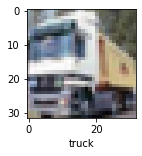

(50000, 32, 32, 3)
Epoch 1/20
1563/1563 [==============================] - 15s 7ms/step - loss: 1.5083 - accuracy: 0.4553
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1137 - accuracy: 0.6094
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9518 - accuracy: 0.6680
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8524 - accuracy: 0.7035
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7705 - accuracy: 0.7327
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7102 - accuracy: 0.7528
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6571 - accuracy: 0.7693
Epoch 8/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6086 - accuracy: 0.7884
Epoch 9/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5714 - accuracy: 0.7997
Epoch 10/20
1563/1563 [==============================] - 6s 4m

In [3]:
if __name__ == "__main__":
    # initialize the object instance for the classifier class
    cnn = CNNClassifier()
    print('Data Summary')
    print("X_train: ",cnn.X_train.shape)
    print("X_test: ", cnn.X_test.shape)
    print("y_train: ", cnn.y_train.shape)
    print("y_test: ", cnn.y_test.shape)
    cnn.plot_sample(cnn.X_train,cnn.y_train,1)

    # normalize the dataset
    cnn.normalize_data()
    print(cnn.X_train_scaled.shape)
    """
    ## Executing the simple ANN
    model = cnn.sample_NNmodel()
    print("Model Evaluation for NN: \\n",model.evaluate(cnn.X_test_scaled,cnn.y_test))
    cnn.generate_classifcation_report(model)
    """
    ## Executing the CNN model
    model = cnn.cnnModel(epochs = 20)
    print("Model Evaluation for CNN: \\n", model.evaluate(cnn.X_test_scaled, cnn.y_test))
    y_classes = cnn.generate_classifcation_report(model)

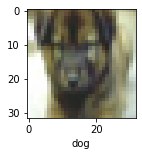

In [4]:
cnn.plot_sample(cnn.X_test,cnn.y_test,33)

In [5]:
cnn.classes[y_classes[33]]

'dog'

In [6]:
cm = confusion_matrix(cnn.y_test,y_classes)
cm

array([[682,  34,  69,  10,  16,   9,   6,  25, 107,  42],
       [  9, 858,   3,   8,   3,   4,   6,   0,  27,  82],
       [ 56,  12, 592,  67,  51,  89,  57,  41,  22,  13],
       [ 29,  11,  54, 502,  53, 188,  68,  40,  21,  34],
       [ 14,   6,  87,  67, 593,  66,  52,  82,  21,  12],
       [ 12,   4,  61, 136,  31, 659,  24,  46,  12,  15],
       [  9,   5,  47,  59,  23,  38, 782,   7,  18,  12],
       [ 13,  10,  37,  39,  52,  76,   7, 723,   7,  36],
       [ 34,  43,  13,   8,   2,   6,   4,   2, 856,  32],
       [ 22,  90,   8,  12,   5,   6,   8,   4,  36, 809]])

In [7]:
import seaborn as sns

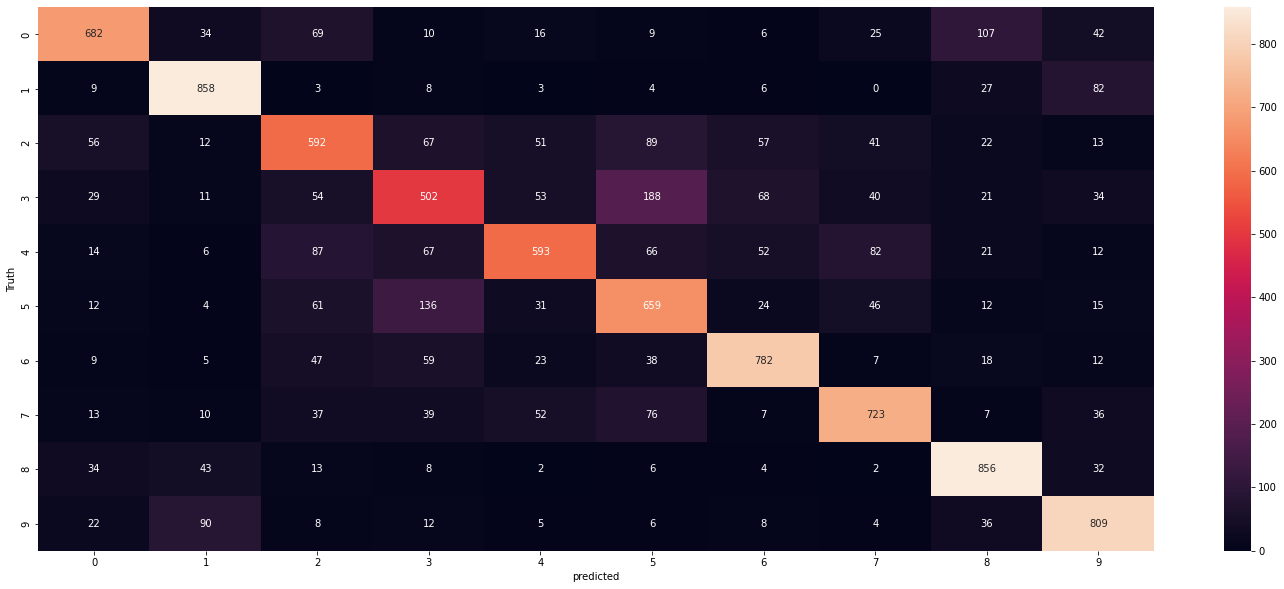

In [8]:
plt.figure(figsize=(25,10))
sns.heatmap(cm, annot=True, fmt = 'd')
plt.xlabel('predicted')
plt.ylabel('Truth')
plt.show()
